<a href="https://colab.research.google.com/github/varun-beep/Computer_VisionLab/blob/main/linear_and_nonlinear_spatial_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, minimum_filter, maximum_filter

In [2]:
def apply_filter(image, kernel, correlation=False):
    mode = cv2.BORDER_DEFAULT
    if correlation:
        return cv2.filter2D(image, -1, kernel, borderType=mode)  # Correlation
    return cv2.filter2D(image, -1, np.flip(kernel), borderType=mode)  # Convolution

def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

In [3]:
# Load image (grayscale)
image = cv2.imread('/content/F40.jpg', cv2.IMREAD_GRAYSCALE)

Q1: Why is a Gaussian filter classified as a linear filter and how does it affect spatial frequency components?


A Gaussian filter is a linear filter because it applies a weighted sum of pixel intensities in a local region using a Gaussian function, which follows the principle of linearity (additivity and homogeneity).
It smooths the image by reducing high-frequency components (sharp edges and noise) while preserving low-frequency components (gradual intensity changes).
Increasing the sigma (σ) value increases the spread of the Gaussian kernel, leading to stronger blurring.
The choice of border style (e.g., 'nearest', 'reflect', 'constant') affects how the image edges are handled when applying the filter.

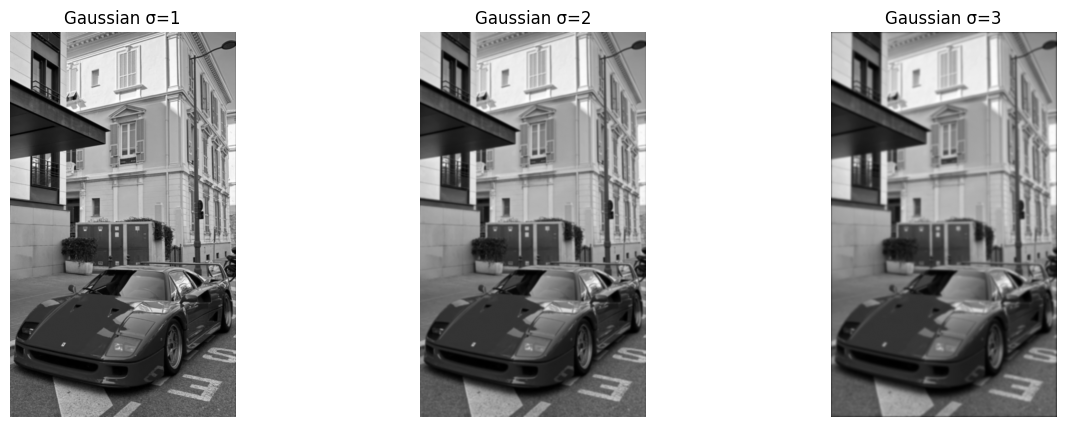

In [4]:
# Q1: Apply Gaussian filter with different sigma values and border styles
gaussian_1 = gaussian_filter(image, sigma=1, mode='nearest')
gaussian_2 = gaussian_filter(image, sigma=2, mode='reflect')
gaussian_3 = gaussian_filter(image, sigma=3, mode='constant')
show_images([gaussian_1, gaussian_2, gaussian_3], ['Gaussian σ=1', 'Gaussian σ=2', 'Gaussian σ=3'])

A box filter (mean filter) assigns equal weight to all pixels in the kernel, averaging them to produce a smoothed result. This leads to excessive blurring and loss of edge details since it does not prioritize central pixels. It effectively reduces noise but also removes fine details and sharp transitions, making edges appear less distinct.

In contrast, a Gaussian filter applies a weighted average, giving higher importance to central pixels and gradually decreasing weights toward the edges. This makes it more effective at preserving edges while still smoothing noise. The Gaussian filter reduces high-frequency components while maintaining structural details better than the box filter.


The Difference :
Both filters perform blurring, so at first glance, the output may look similar.
The Box Filter averages all pixels equally, leading to a slightly more uniform blur.
The Gaussian Filter gives more weight to central pixels, preserving edges slightly better than the box filter.


Notice the Difference?:
Look at edges and fine details (e.g., the car edges, text on the road).
Box filtering causes more uniform blur across the image.
Gaussian filtering retains some sharpness at edges.
If the difference is not obvious, you can try:

Increasing Kernel Size: Use a (9,9) filter instead of (5,5).
Comparing Edge Maps: Apply an edge detector (like Sobel) after filtering to see the difference in edge preservation.
Checking Frequency Response: Visualize the Fourier Transform of both images.

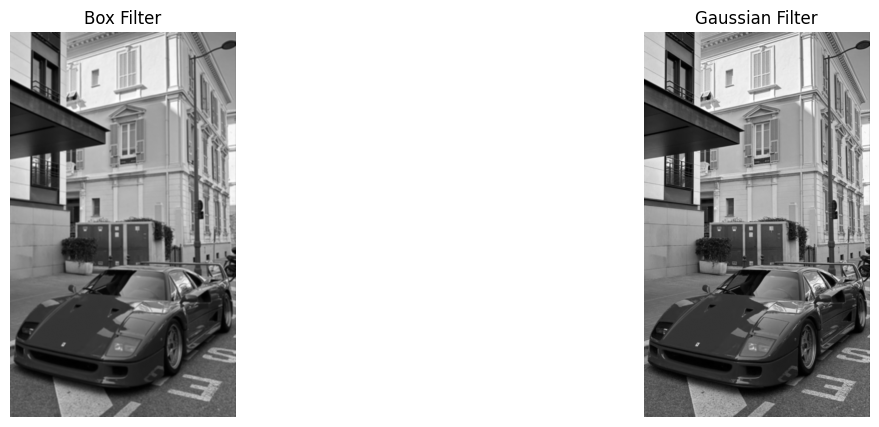

In [10]:
# Q2: Box filter (mean filter) vs Gaussian filter
box_filter = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 1)
show_images([box_filter, gaussian_blur], ['Box Filter', 'Gaussian Filter'])

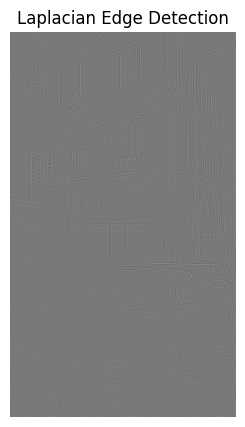

In [6]:
# Q4: Laplacian filter for edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)
show_images([laplacian], ['Laplacian Edge Detection'])

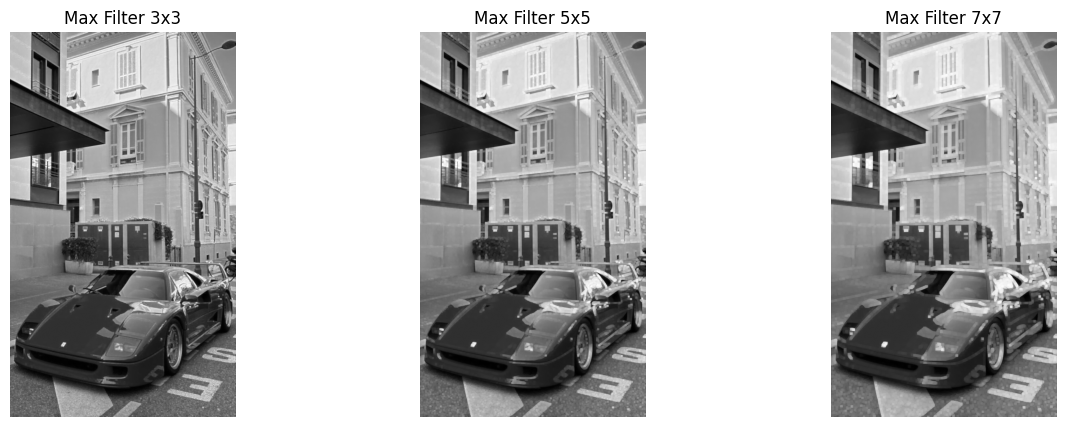

In [7]:
# Q5: Maximum filter to remove pepper noise
max_3 = maximum_filter(image, size=3)
max_5 = maximum_filter(image, size=5)
max_7 = maximum_filter(image, size=7)
show_images([max_3, max_5, max_7], ['Max Filter 3x3', 'Max Filter 5x5', 'Max Filter 7x7'])

Q6: Why is a median filter considered a non-linear filter, and how does it handle salt-and-pepper noise?



The median filter is non-linear because it does not compute a weighted sum of neighboring pixels like linear filters.
Instead, it sorts the pixel values in a local window and selects the median value, which preserves edges while removing outliers (salt-and-pepper noise).
Gaussian filtering, in contrast, averages neighboring pixels, which can blur edges instead of removing noise effectively.
Median filtering is better for salt-and-pepper noise removal, while Gaussian filtering is more effective for random noise reduction.

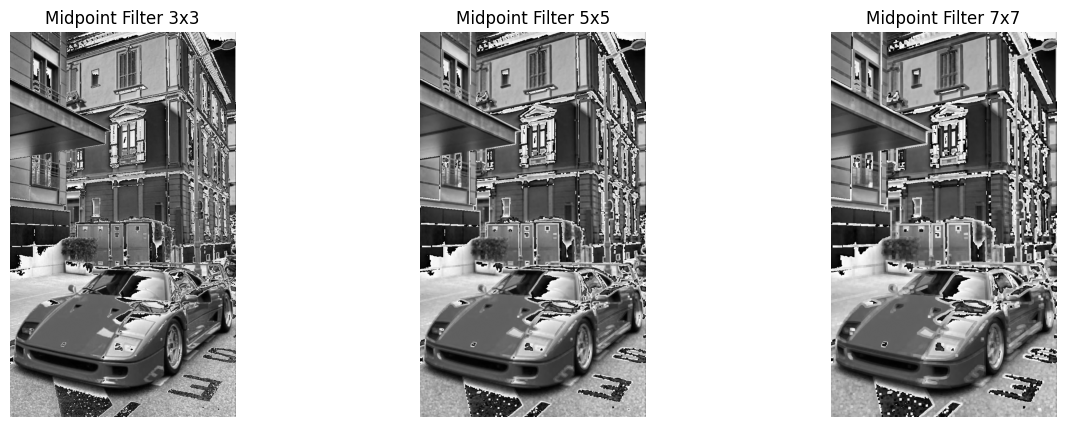

In [9]:
# Q7: Midpoint filter (average of min and max filters)
def midpoint_filter(image, size):
    return (minimum_filter(image, size) + maximum_filter(image, size)) / 2

mid_3 = midpoint_filter(image, 3)
mid_5 = midpoint_filter(image, 5)
mid_7 = midpoint_filter(image, 7)
show_images([mid_3, mid_5, mid_7], ['Midpoint Filter 3x3', 'Midpoint Filter 5x5', 'Midpoint Filter 7x7'])